# Dermatology Database 
**(40 marks)**

 * This database contains 34 attributes, 33 of which are linear
   valued and one of them is nominal. 


 * The differential diagnosis of erythemato-squamous diseases is a real
   problem in dermatology. They all share the clinical features of
   erythema and scaling, with very little differences. The diseases in
   this group are psoriasis, seboreic dermatitis, lichen planus, 
   pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
   Usually a biopsy is necessary for the diagnosis but unfortunately
   these diseases share many histopathological features as
   well. Another difficulty for the differential diagnosis is that a
   disease may show the features of another disease at the beginning
   stage and may have the characteristic features at the following stages. 
   Patients were first evaluated clinically with 12 features.
   Afterwards, skin samples were taken for the evaluation of 22
   histopathological features. The values of the histopathological features
   are determined by an analysis of the samples under a microscope. 


 * In the dataset constructed for this domain, the family history feature
   has the value 1 if any of these diseases has been observed in the
   family, and 0 otherwise. The age feature simply represents the age of
   the patient. Every other feature (clinical and histopathological) was
   given a degree in the range of 0 to 3. Here, 0 indicates that the
   feature was not present, 3 indicates the largest amount possible,
   and 1, 2 indicate the relative intermediate values.

 * The Dataset is taken from here - [Dermatology Dataset](https://archive.ics.uci.edu/ml/datasets/dermatology)

# Steps Involved:

 1. Importing the library
 2. Loading the Dataset
 3. Structure of the Dataset
 4. Exploration of Dataset
  * Statistics
  * Data Cleaning
  * Heat Map
 5. PCA Implementation
 6. Machine learning Model
  * Splitting the Dataset
  * Training the Model
  * Prediction
  * Model Score

# 1. Importing the library

In [2]:
# Q1. Import all the required Packages like numpy ,pandas , plotting , etc.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset 

In [3]:
# Q2. Load the dataset of Dermatology.
import pandas as pd
df=pd.read_csv('dermatology.csv')
df

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
361,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
362,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
363,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


'''If the data is taken from the numpy,try to convert it into dataframe ''';
   
Q3. Rename the columns in human readable form. The details of the column names can be found in description (Readme.md - Clinincal attributes) **(1 marks)**

In [8]:
##Start code here

df.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis',
'hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis',
'inflammatory monoluclear inflitrate','band-like infiltrate','Age (linear)', 'Classcode']
df
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
361,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
362,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
363,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


Q4. Print the column names in the dataset.**(1 marks)**

In [10]:
##Start code here
df.columns
##End here

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history(0 or 1)', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'dlubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age (linear)', 'Classcode'],
      dtype='object')

'''The Last Column, i.e ClassCode of the plant is your target value''';

Q5. Print the target value. **(1 mark)**

In [82]:
##Start code here
df["Classcode"]
##End here

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Classcode, Length: 365, dtype: int64

Q6. Save the target value in some other variable and print it. **(1 mark)**

In [83]:
##Start code here
tar=df["Classcode"]
tar
##End here

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Classcode, Length: 365, dtype: int64

# 3. Structure of the Dataset

Q1. Print the shape of the dataframe and target variable respectively. **(1 marks)**

Q2. Print the describe of the dataset. **(1 marks)**

In [19]:
##Start code here
print(df.shape)
print(tar.shape)
##End here

(365, 35)
(365,)


In [21]:
##Start code here
df.describe()
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Classcode
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164,2.805479
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044,1.599441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


## Missing or Null Points

Q1.Check for null value in the features. **(1 marks)**

Q2.Check for nan value in the features. **(1 marks)**

In [23]:
##Start code here
df.isnull().sum()
##End here

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [25]:
##Start code here
df.isna().any()
##End here

erythema                                    False
scaling                                     False
definite borders                            False
itching                                     False
koebner phenomenon                          False
polygonal papules                           False
follicular papules                          False
oral mucosal involvement                    False
knee and elbow involvement                  False
scalp involvement                           False
family history(0 or 1)                      False
melanin incontinence                        False
eosinophils in the infiltrate               False
PNL infiltrate                              False
fibrosis of the papillary dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
dlubbing of the rete ridges                 False


**'''Check whether you get any null value or nan value''';**

**#If found try to avoid that, and if not proceed to next step**

# 4. Exploration of the Dataset

## Statistics

For our very first coding implementation, we will calculate descriptive statistics about the Dermatology Dataset. Since numpy has already been imported for us, using this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, we will need to implement the following:

 * Calculate the minimum, maximum, mean, median, and Unique of 'ClassCode'.
 * Store each calculation in their respective variable.

In [29]:
# Q1. Find the Mininum of the 'ClassCode'.(1 marks)

tar.min()
# Q2. Find the Maximum of the 'ClassCode'.(1 marks)
tar.max()

# Q3. Find the Mean of the 'ClassCode'.(1 marks)
tar.mean()

# Q4. Find the Median of the 'ClassCode'.(1 marks)
tar.median()

# Q5. Find the Unique of the 'ClassCode'.(1 marks)
tar.unique()
# Print all the calculated statistics above.
print(tar.min())
print(tar.max())
print(tar.mean())
print(tar.median())
print(tar.unique())

1
6
2.8054794520547945
3.0
[1 3 2 5 4 6]


After statistics analysis, go for the graphical representation

Q6. Use displot from seaborn on the target value.(1 marks)

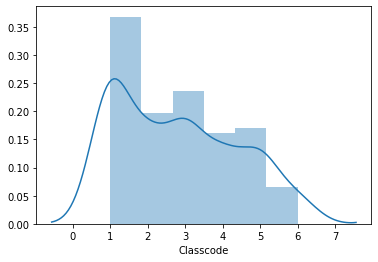

In [30]:
##Start code here
sns.distplot(tar)
plt.show()
##End here

'''Get some observation from the above graph and perform the filteration at this level, if you found.''';

Q7. Use value_counts on the target variable to count its value.(1 marks)

In [31]:
##Start code here
tar.value_counts()
##End here

1    112
3     72
2     60
5     52
4     49
6     20
Name: Classcode, dtype: int64

## Data Cleaning
**(3 marks)**

Some part of the data has issues. Like the Age column.

Q1. Check for any feature that needs to be resolve. Hint: Check for "?" in feature, search for it. (1 marks)

Q2. Replace those values with nan.(1 marks)

Q3. Replace nan with other statistics, like mean, mode etc.(1 marks)

In [32]:
##Start code here
df[df["Age (linear)"] == "?"]
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [33]:
##Start code here
df.replace('?', np.nan)
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
361,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
362,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
363,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [34]:
##Start code here
df['Age (linear)'] = pd.to_numeric(df['Age (linear)'], errors='coerce')
df['Age (linear)'].fillna(df['Age (linear)'].mean(),inplace=True)
df.head()
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2


## Heat Map

'''Check for Correlation in the Dataset''';

Q1. Use heat map in the seaborn library to get the correlation graph. **(1 marks)**

In [35]:
##Start code here
corr_df=df
corr_df['Age (linear)']=tar
corr_df.head()
##End here

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,3,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,1,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,3,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,2,2


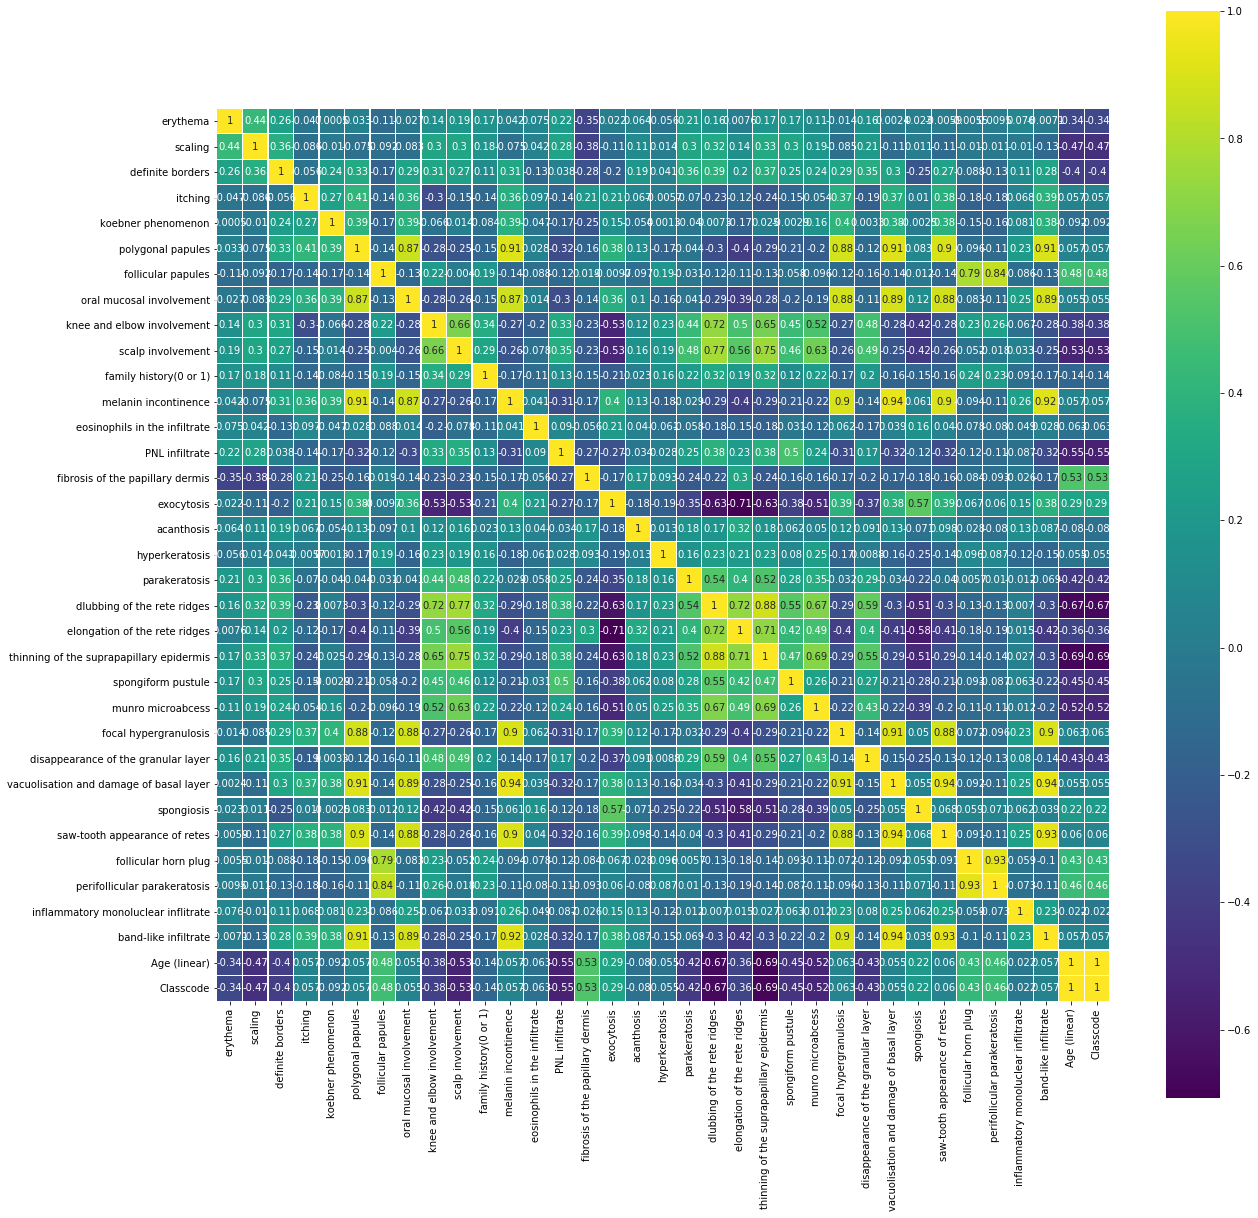

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

A heat map uses a warm-to-cool color spectrum to show dataset analytics, namely which parts of data receive the most attention.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

**Is there any relations among the features?**

'''Try to get some correlation from the above graph, and try to use the features 
   only with the more positive correlation and more correlation''';

# 5. PCA Implementation

#The Class code column is the value that needs to be predicted from the analysis. 

Q1. Hence you will have to split X and y(Features and labels) based on this information.**(1 marks)**

In [39]:
##Start code here
x = df.drop("Classcode",axis=1)
y = df["Classcode"]
##End here

Q2. Use the Standard Scaler fit transform.**(1 marks)**

In [40]:
##Start code here
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(x)
##End here

Q3. print the scaled_data.**(1 marks)**

In [41]:
##Start code here
scaled_data
##End here

array([[ 1.40130251,  1.71856645,  1.60039684, ..., -1.19843846,
        -0.50307665, -1.13036852],
       [-0.10303695, -1.13269152,  0.4940619 , ...,  0.18146702,
         2.21056341,  0.12178477],
       [-0.10303695,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665, -1.13036852],
       ...,
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  0.18146702,
         2.21056341,  0.12178477],
       [-0.10303695, -1.13269152,  1.60039684, ...,  0.18146702,
         2.21056341,  0.12178477],
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665, -1.13036852]])

## The Algebra for PCA

 * Calculating the covarience matrix. 
 * Calculating the eigen values and eigen vectors.
 * Forming Principal Components. 
 * Projection into the new features space.

### a). Calculating the covarience matrix

 * Covarience matrix is a matrix of variances and covariances(or correlations) among every pair of the m variable.
 * It is square, symmetric matrix.
 * Covarience matrix (S) = X.T* X, we can find it by using numpy matmul() function in python.

Q1. Find the covarience matrix which is : X.T*X .**(1 marks)**

Q2. Perform the Matrix multiplication using numpy.**(1 marks)**

Q3. Print the shape of variance matrix.**(1 marks)**

In [84]:
##Start code here
s = scaled_data
s
##End here

array([[ 1.40130251,  1.71856645,  1.60039684, ..., -1.19843846,
        -0.50307665, -1.13036852],
       [-0.10303695, -1.13269152,  0.4940619 , ...,  0.18146702,
         2.21056341,  0.12178477],
       [-0.10303695,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665, -1.13036852],
       ...,
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  0.18146702,
         2.21056341,  0.12178477],
       [-0.10303695, -1.13269152,  1.60039684, ...,  0.18146702,
         2.21056341,  0.12178477],
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665, -1.13036852]])

In [85]:
##Start code here
covar_matrix=np.matmul(s.T,s)
covar_matrix
##End here

array([[ 365.        ,  158.99639988,   95.13887217, ...,   27.58316277,
          -2.59100812, -122.56715228],
       [ 158.99639988,  365.        ,  131.70893627, ...,   -3.66498251,
         -48.08424094, -171.00337595],
       [  95.13887217,  131.70893627,  365.        , ...,   39.02755048,
         102.72989709, -144.56089676],
       ...,
       [  27.58316277,   -3.66498251,   39.02755048, ...,  365.        ,
          85.74545043,   -8.06647082],
       [  -2.59100812,  -48.08424094,  102.72989709, ...,   85.74545043,
         365.        ,   20.66353583],
       [-122.56715228, -171.00337595, -144.56089676, ...,   -8.06647082,
          20.66353583,  365.        ]])

In [44]:
##Start code here
covar_matrix.shape
##End here

(34, 34)

### b). Calculating the eigen values and eigen vectors

 * ƛ is an eigenvalue for a matrix X if it is a solution of the characteristic equation: det( ƛ*I - A ) = 0 Where, I is the identity matrix of the same dimension as X
 * The sum of all m eigenvalues equals the trace of S (the sum of the variances of the original variables).
 * For each eigenvalue ƛ, a corresponding eigen-vector v, can be found by solving : ( ƛ*I - A )v = 0
 * The eigenvalues, ƛ1, ƛ2, ... ƛm are the variances of the coordinates on each principal component axis.

In [47]:
# Q. Find top two eigen value and corresponding eigen vectors and print it. **(1 marks)**
#for projecting onto a 2-Dimension space.
from scipy.linalg import eigh
values,vector=eigh(covar_matrix,eigvals=(32,33))
print(vector.shape)
#convert the eigen vectors into (2,d) shape for easyness of further computations. **(1 marks)**
vector=vector.T
print(vector.shape)
#the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
#the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

(34, 2)
(2, 34)


### c). Forming Principal Components

In [49]:
# Q. Project the original data sample on the plane. **(1 marks)**
# These are formed by two principal eigen vectors by vector-vector multiplication.
##Start code here
org=np.matmul(vector,s.T)
##End here

In [50]:
# Q. Print the new data point shape.
##Start code here
org.shape
##End here

(2, 365)

### d). Projection into the new features space

Q. Create the Dataframe having 1st principal & 2nd principal. **(1  marks)**

Q. Create new_dataframe for plotting labeled points(i.e, target variable). **(1  marks)**

In [51]:
##Start code here
org.T.shape,y.shape
##End here

((365, 2), (365,))

In [53]:
##Start code here
data=pd.DataFrame(data=new_cor.T,columns=['1st principal','2nd principal'])
data['target']=y
data.head()
##End here

,1st principal,2nd principal,target
0,-2.175377,-3.425668,1
1,-2.565527,5.071269,3
2,-2.601015,-4.750697,1
3,-3.162408,4.557079,3
4,1.099030,-0.232363,2


Q. Plot the 2d data points with seaborn. **(2 marks)**

<function matplotlib.pyplot.show(*args, **kw)>

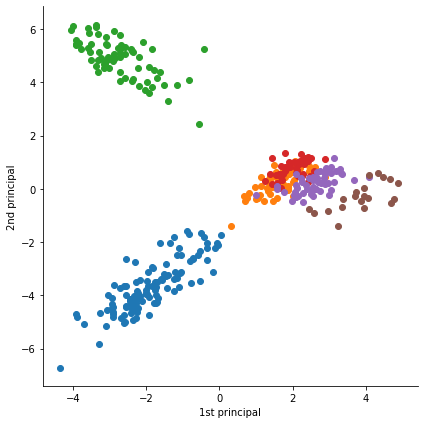

In [54]:
##Start code here
sns.FacetGrid(data, hue="target", height=6).map(plt.scatter, '1st principal', '2nd principal')
plt.show
##End here

# 6. Machine learning Model 

In [33]:
'''Use any Classification Model''';

## Splitting the Data

Q1. Use train_test_split.**(1 marks)**

'''split the data in 70:30 ratio''';

In [55]:
##Start code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['1st principal','2nd principal']], y, test_size=0.3, random_state=0)
##End here
##End here

Q2. Print the shape of train data. **(1 marks)**

In [56]:
##Start code here
X_train.shape,y_train.shape
##End here

((255, 2), (255,))

Q3. Print the shape of test_data. **(1 marks)**

In [58]:
##Start code here
X_test.shape,y_test.shape
##End here

((110, 2), (110,))

## Import the Classifier Model
**(1 marks)**

Q4. Use inbuilt classifier model from scikit

Q5. Call the classifier

In [59]:
##Start code here
from sklearn.tree import DecisionTreeClassifier
##End here

In [73]:
##Start code here
tree = DecisionTreeClassifier()
##End here

## Training the Model

Q6. Train the model on training Data using inbuilt .fit **(1 marks)**

In [74]:
##Start code here
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
##End here

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Testing the Model

Q7. Predict the y_predict from .predict function on X_test. **(1 marks)**

In [75]:
##Start code here
tree.predict(X_test)
##End here

array([1, 4, 2, 2, 5, 5, 4, 3, 6, 3, 5, 1, 5, 3, 3, 1, 5, 1, 4, 1, 3, 6,
       6, 1, 4, 3, 1, 4, 3, 3, 2, 2, 2, 3, 1, 2, 1, 5, 4, 3, 1, 1, 3, 4,
       2, 4, 3, 3, 1, 1, 3, 2, 1, 1, 1, 4, 1, 4, 2, 1, 3, 4, 2, 5, 5, 6,
       3, 1, 2, 2, 2, 1, 5, 5, 2, 1, 2, 1, 1, 1, 5, 3, 5, 3, 4, 2, 1, 1,
       2, 1, 3, 3, 1, 4, 6, 5, 3, 4, 1, 1, 2, 2, 5, 1, 3, 4, 4, 1, 1, 4],
      dtype=int64)

## Model Score

Q8. Print the Model Score.**(1 marks)**

Q9. Print the Graph related. **(1 marks)**

In [63]:
##Start code here
tree.score(X_test,y_test)
##End here

0.7909090909090909

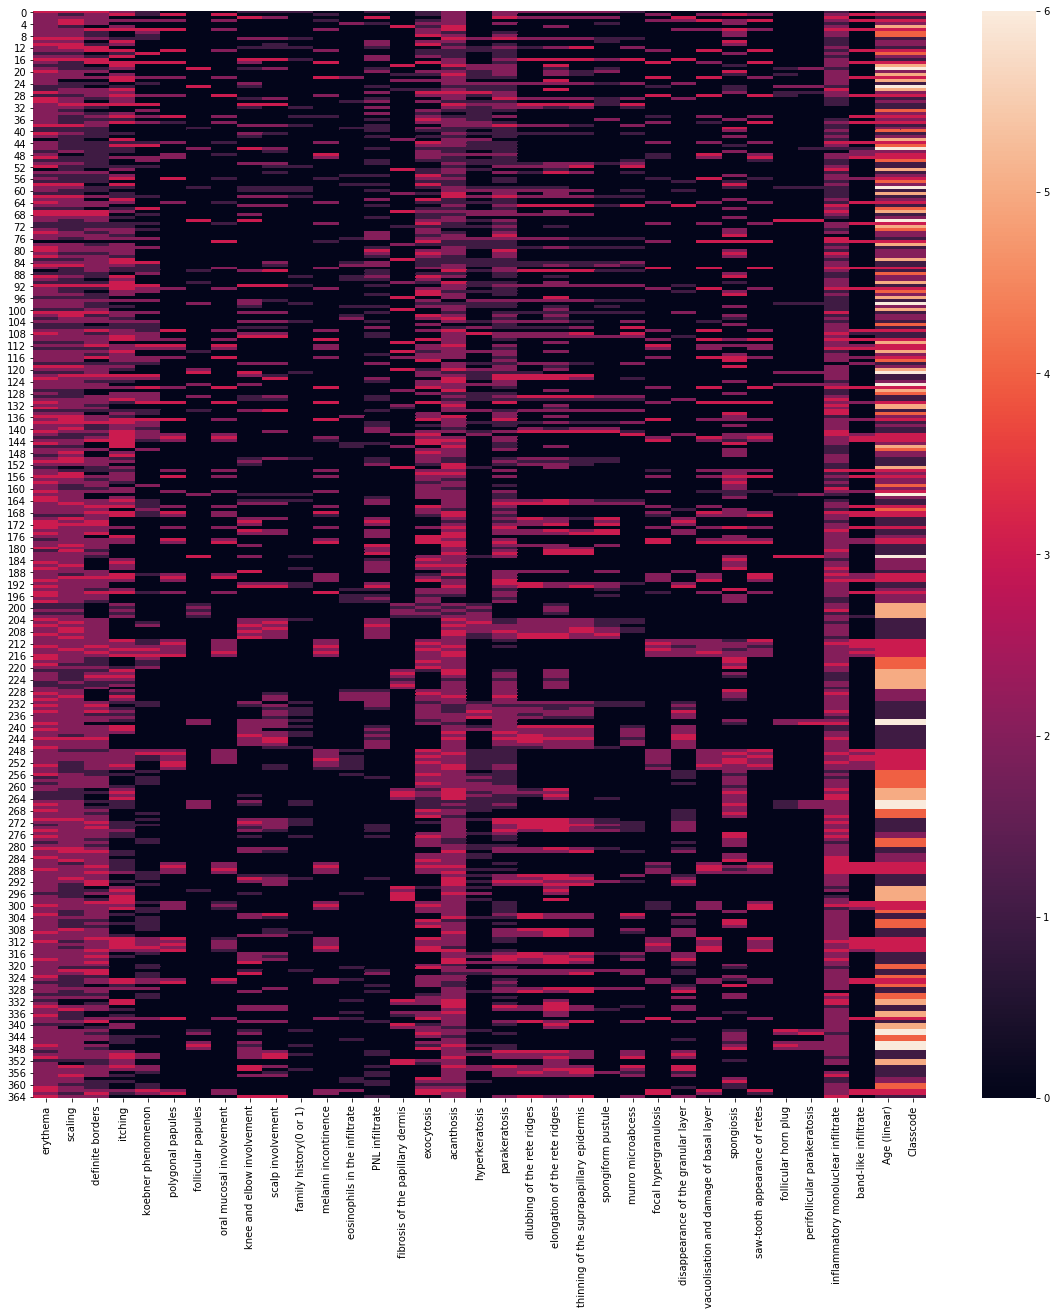

In [64]:
##Start code here
plt.figure(figsize=(20, 20))
sns.heatmap(df)
plt.show()
##End here